In [1]:
import pandas as pd, numpy as np, requests

In [2]:
from bs4 import BeautifulSoup
#from pygeocoder import Geocoder
#Geocoder.geocode('547605, ROMANIA')

In [8]:
#ha megvan mar az adatfjal, betoltes, ha nincs akkor az alabbi cella futtasaval generalhatoak
data=[pd.DataFrame]*7
data[6]=pd.read_excel('data.xls')

In [ ]:
http://www.omnibus.ro/index.php/hu/szekelyfoldi-top-cegek/also-haromszek

In [8]:
regions[i]

'also-haromszek'

In [12]:
url='http://www.omnibus.ro/index.php/hu/szekelyfoldi-top-cegek/'+regions[i]
pd.read_csv(url)
#r=requests.get('http://www.omnibus.ro/index.php/hu/szekelyfoldi-top-cegek/'+regions[i]+'/')
    

HTTPError: HTTP Error 403: Forbidden

In [11]:
url

'http://www.omnibus.ro/index.php/hu/szekelyfoldi-top-cegek/also-haromszek'

In [6]:
#adatok letoltese az omnibusrol ,eltarthat par percig

regions=['also-haromszek','felso-haromszek','csikszek','udvarhelyszek','marosszek','gyergyoszek']
data=[pd.DataFrame() for i in range(len(regions))]
drop=[[0,3,4,5],[0,3,4,5],[0,3,4,5,6],[0,3,4,5],[0,3,4,5],[0,3,4,5]]
for i in range(len(regions)):
    data[i]=pd.read_html('http://www.omnibus.ro/index.php/hu/szekelyfoldi-top-cegek/'+regions[i])[3].drop(drop[i],axis=1).ix[1:]
    r=requests.get('http://www.omnibus.ro/index.php/hu/szekelyfoldi-top-cegek/'+regions[i]+'/')
    soup = BeautifulSoup(r.content)
    links=soup.findAll('table')[3].findAll('a')
    for j in range(len(links)):
        print i,j
        try:
            r=requests.get('http://www.omnibus.ro/'+links[j]['href'])
            soup = BeautifulSoup(r.content)
            cim=repr(soup.findAll('table')[6])
            cim=cim[str.find(cim,'Cím')+10:str.find(cim,', <a href="#terkep">')-3]
            #data[i].ix[j+1,'cim']=cim
            coord_start=str.find(r.content,'GLatLng')
            coord_end=coord_start+str.find(r.content[coord_start:],')')
            coord=np.array(r.content[coord_start+len('GLatLng')+1:coord_end].split(','),dtype=float)
            data[i].ix[j+1,'lat']=coord[0]
            data[i].ix[j+1,'lon']=coord[1]
            kulcs=repr(soup.findAll('table')[6])
            kulcs=kulcs[str.find(kulcs,'Kulcsszavak')+10:str.find(kulcs,'<b>Webcím')]
            soup = BeautifulSoup(kulcs)
            tags=''
            for k in soup.findAll('a'): tags+=k.get_text()+','
            data[i].ix[j+1,'tags']=tags[0:len(tags)-1]
        except: print 'ERROR'

HTTPError: HTTP Error 403: Forbidden

In [13]:
#data corrections
data[3][2][4]='150.000.000'
data[5]=data[5].ix[1:50]
data[1][1][38]='PRODUCTIE AGRICO M SRL'
data[0]['lat'][24]=45.867885
data[0]['lon'][24]=25.791051
data[1]['lat'][37]=46.002350
data[1]['lon'][37]=26.128932
data[1]['lat'][41]=45.991198
data[1]['lon'][41]=26.136709
data[2]['lat'][19]=46.571644
data[2]['lon'][19]=25.983610
data[2]['lat'][22]=46.313360
data[2]['lon'][22]=25.839070
data[3]['lat'][17]=46.386801
data[3]['lon'][17]=25.215629
data[4]['lat'][39]=46.386801
data[4]['lon'][39]=24.569582
data[0]['tags'][24]=u'CÉGTANÁCSADÁS'
data[0]['tags'][44]=u'TEJFELDOLGOZÁS'
data[1]['tags'][37]=u'ÁRUFUVAROZÁS'
data[1]['tags'][41]=u'ÉPÍTKEZÉS'
data[2]['tags'][19]=u'ERDŐKITERMELÉS'
data[3]['tags'][17]=u'TOP Cégek,'

In [14]:
data.append(pd.DataFrame())
data[6]=pd.concat(data[i] for i in range(6))

In [10]:
cat={}
    
cat[u'ÉLELMISZER - NAGYKERESKEDÉSEK,VEGYI ÁRU,GYÜMÖLCS ÉS ZÖLDSÉG,NAGYBANI KERESKEDELEM, NAGYBANI ELADÁS']=\
cat[u'PÉKTERMÉKEK']=\
cat[u'ÉLELMISZER ADALÉKANYAGOK,almirom@n-soft.net']=\
cat[u'ÉLELMISZER-NAGYKERESKEDÉS,IPARI VEGYESÜZLETEK,ITALNAGYKERESKEDÉS,NAGYKERESKEDELEM']=\
cat[u'ÉLELMISZERÜZLETEK,VEGYES ÜZLETEK']=\
cat[u'ÉLELMISZER – ÜZLETEK']=\
cat[u'HÚSFELDOLGOZÁS,HÚS ÉS HENTESÁRU']=\
cat[u'ÉLELMISZERÜZLETEK,VEGYES ÜZLETEK,perfektsrl@yahoo.com']=\
cat[u'HENTESÁRU-LERAKAT,ÉLELMISZER - NAGYKERESKEDÉSEK']=\
cat[u'SAJTGYÁRTÁS,TEJFELDOLGOZÁS,TEJTERMÉKEK']=\
cat[u'ÉLELMISZER-NAGYKERESKEDÉS,ITAL NAGYKERESKEDÉS,SÖR-NAGYKERESKEDÉS,SZESZESITAL NAGYKERESKEDÉS']=\
cat[u'ÉLELMISZER-NAGYKERESKEDÉS,ITAL NAGYKERESKEDÉS,SÖR-NAGYKERESKEDÉS,']=\
cat[u'ÉLELMISZER-KERESKEDELEM,ÉLELMISZERÜZLETEK,ÁRUHÁZAK,SZUPERMARKETEK']=\
cat[u'ÉLELMISZERIPAR']=\
cat[u'ÉLELMISZER – KERESKEDELEM,SZESZES ITALOK,office@dominotrade.ro']=\
cat[u'ÉLELMISZEREK,HÚSÜZLETEK']=\
cat[u'KERESKEDELEM,SZÁRAZ TÉSZTA,TÉSZTA FORGALMAZÁS,TÉSZTA GYÁRTÁS,LISZT FORGALMAZÁS,MALMI TERMÉKEK']=\
cat[u'ÉLELMISZEREK,KERESKEDELEM']=\
cat[u'ÉLELMISZEREK,mixtcom@hr.astral.ro']=\
cat[u'ÉLELMISZER-NAGYKERESKEDÉS,hargitha@prosoftgrup.ro']=\
cat[u'TEJFELDOLGOZÁS,TEJTERMÉKEK']=\
cat[u'KENYÉRÜZLETEK,PÉKTERMÉKEK']=\
cat[u'ÉLELMISZEREK,SZUPERMARKETEK,ilu1@clicknet.ro']=\
cat[u'KENYÉR ÉS PÉKÁRU,PÉKSÜTEMÉNYEK']=\
cat[u'ÉLELMISZER']=\
cat[u'SAJTGYÁRTÁS']=\
cat[u'HÚSFELDOLGOZÁS,HÚS ÉS HENTESÁRU,VÁGÓHÍD,toroimpex@toroimpex.ro']=\
cat[u'TEJFELDOLGOZÁS']=\
cat[u'HÚSFELDOLGOZÁS']=\
cat[u'PÉKÁRU ÉS PÉKSÜTEMÉNYEK,KENYÉR ÉS PÉKÁRU,CUKRÁSZTERMÉKEK,SÜTEMÉNYEK ÉS TORTÁK']=\
cat[u'ÉLELMISZERIPAR – FÓLIAGYÁRTÁS']=\
cat[u'ÉLELMISZER-NAGYKERESKEDÉS']=\
cat[u'ÉLELMISZER-NAGYKERESKEDÉS,ervinimpex@clicknet.ro']=\
cat[u'ÉLELMISZEREK']=\
cat[u'HÚSBOLTOK,VÁGÓHÍD']=\
cat[u'ÉLELMISZEREK,HÚS ÉS HENTESÁRU,SZUPERMARKETEK']=0#elemiszeripar

cat[u'ALUMÍNIUM FÉLGYÁRTMÁNYOK,INOX LEMEZEK,MŰANYAG LEMEZEK,POLIKARBONÁT LEMEZEK,RÉZ ÉS SÁRGARÉZ']=\
cat[u'ACÉLTERMÉKEK,SZÍNESFÉM-KERESKEDELEM,BETONACÉL MEGMUNKÁLÁS, ERESZCSATORNA RENDSZEREK']=\
cat[u'FÉMMEGMUNKÁLÁS']=\
cat[u'AJTÓ-ABLAKGYÁRTÁS,NYÍLÁSZÁRÓK']=\
cat[u'MŰANYAG TERMÉKEK']=\
cat[u'AUTÓALKATRÉSZ GYÁRTÁS']=\
cat[u'KÁBELEK']=\
cat[u'FÉMMEGMUNKÁLÁS,KERTI BÚTOROK,MATRICAGYÁRTÁS,ÖNTŐMINTÁK']=\
cat[u'CSOMAGOLÓANYAGOK,NYOMDÁK']=\
cat[u'CSOMAGOLÓANYAGOK-GYÁRTÁS ÉS FORGALMAZÁS']=\
cat[u'ACÉLTERMÉKEK,ÉPÍTŐANYAG-LERAKATOK']=\
cat[u'ALUMÍNIUM FÉLGYÁRTMÁNYOK,INOX LEMEZEK,MŰANYAG LEMEZEK,POLIKARBONÁT ']=\
cat[u'FÉMMEGMUNKÁLÁS,MUNKAGÉPEK']=\
cat[u'ERESZCSATORNA RENDSZEREK']=\
cat[u'ÉPÜLETGÉPÉSZET,IPARI SZELLŐZTETŐK']=\
cat[u'AJTÓ-ABLAKVASALAT']=\
cat[u'Harta,0741-33165,,AMBALAJE']=\
cat[u'MŰANYAG TERMÉKEK']=\
cat[u'AJTÓ-ABLAKGYÁRTÁS,NYÍLÁSZÁRÓK']=\
cat[u'CSOMAGOLÁSTECHNIKA,RAKLAPOK']=\
cat[u'KÖTŐELEMEK']=\
cat[u'VASALATOK GYÁRTÁSA,office@pop.ro']=\
cat[u'FÉMBÚTOROK,FÉMSZERKEZETEK']=\
cat[u'POLISZTIRÉN GYÁRTÁS']=\
cat[u'CNC MEGMUNKÁLÁS']=\
cat[u'VÍZ- és CSATORNAHÁLÓZAT,HIDROFOROK GYÁRTÁSA']=\
cat[u'CSOMAGOLÓANYAGOK,MŰANYAG FÓLIÁK GYÁRTÁSA']=\
cat[u'']=\
cat[u'JÁTÉKOK és JÁTÉKSZEREK GYÁRTÁSA,FAJÁTÉKOK']=\
cat[u'KOPORSÓKÉSZÍTÉS']=\
cat[u'NYOMDÁK']=\
cat[u'GYEREKMATRACOK,JÁTÉKOK és JÁTÉKSZEREK,CSÚSZDÁK']=\
cat[u'MÜANYAGFRÖCCSENTÉS']=\
cat[u'JÁTÉKOK és JÁTÉKSZEREK GYÁRTÁSA,FAJÁTÉKOK']=\
cat[u'DOBOZOK']=11#kisfem es muanyag

cat[u'KOMPRESSZOROK']=\
cat[u'AUTÓ – KERESKEDELEM']=\
cat[u'ELEKTRONIKAI CIKKEK,HÁZTARTÁSI CIKKEK,HŰTÉSTECHNIKA,IPARI VEGYESÜZLETEK,office@bcm.ro']=\
cat[u'AKKUMULÁTOROK,AUTÓ- és MOTOROLAJAK,AUTÓGUMI-KERESKEDELEM,AUTÓKOZMETIKA,GUMIABRONCS-NAGYKERESKEDÉS,MOTOROLAJAK,GUMIABRONCSOK']=\
cat[u'AUTÓ – ALKATRÉSZEK']=\
cat[u'MUNKAGÉPEK']=\
cat[u'VEGYES ÜZLETEK,palas_zoli@yahoo.com']=\
cat[u'IPARI GÉPEK,ildiko.nemet@romoil.net']=\
cat[u'DOHÁNYÁRUK,tothcomel@clicknet.ro']=\
cat[u'SZESZES ITALOK,critosdistribution@yahoo.com']=\
cat[u'INFRASZAUNA,SZAUNÁK,KERTI BÚTOROK']=\
cat[u'VEGYESÜZLETEK,office@bcm.ro']=\
cat[u'ELEKTRONIKAI CIKKEK,HÁZTARTÁSI CIKKEK,HŰTÉSTECHNIKA,IPARI']=\
cat[u'AUTÓ - MÁRKAKÉPVISELET,']=\
cat[u'AUTÓ - MÁRKAKÉPVISELET']=\
cat[u'SZESZESITAL NAGYKERESKEDÉS']=\
cat[u'AJÁNDÉKTÁRGYAK']=\
cat[u'HÁZTARTÁSI GÉPEK']=\
cat[u'HOBBI- ÉS BARKÁCSBOLTOK,IPARI TERMÉKEK,j.darvas@yahoo.com']=\
cat[u'SZESZES ITALOK']=\
cat[u'HŰTÉSTECHNIKA,IPARI HŰTŐK']=\
cat[u'AUTÓ - MÁRKAKÉPVISELET']=\
cat[u'AUTÓ – GUMIABRONCSOK,AUTÓ – GUMIABRONCS-NAGYKERESKEDÉS,GUMIABRONCSOK']=\
cat[u'ITAL NAGYKERESKEDÉS']=\
cat[u'ORVOSI BERENDEZÉSEK']=\
cat[u'AUTÓKERESKEDELEM']=\
cat[u'VEGYES ÜZLETEK']=\
cat[u'SÍFELSZERELÉSEK,SPORTFELSZERELÉS']=\
cat[u'KERESKEDELEM']=\
cat[u'MAGASNYOMÁSÚ POMPÁK,silvia.boncutiu@eurogassystems.com']=\
cat[u'FŰTÉSRENDSZEREK,IPARI KERÁMIA,FÜTŐTESTEK']=\
cat[u'AUTÓGUMIABRONCSOK ÉS BELSŐK,GUMIABRONCS-FORGALMAZÁS,AUTÓ - ITP MŰSZAKI ELLENŐRZÉS,AUTÓJAVÍTÁS,AUTÓ - ALKATRÉSZEK,GUMIABRONCS-NAGYKERESKEDÉS,GUMIABRONCS-SZERELÉS ÉS JAVÍTÁS,GUMIABRONCSOK']=\
cat[u'KÁVÉIMPORT']=\
cat[u'HŐÁLLÓ ÜVEGEK,FŰTÉS – KÁLYHÁK ÉS KAZÁNOK,KANDALLÓK']=\
cat[u'ELEKTRONIKAI CIKKEK']=\
cat[u'DOHÁNYÁRU NAGYKERESKEDÉS,ÉLELMISZER-NAGYKERESKEDÉS,ITAL NAGYKERESKEDÉS,KÁVÉ-NAGYKERESKEDÉS,luciferattila@yahoo.com']=\
cat[u'ÁRAMTELEPEK ÉS ELEMEK,office@batteryteam.ro']=3#kereskedelem

cat[u'CIPŐ és LÁBBELI,LÁBBELI ÉS CIPŐ']=\
cat[u'TEXTILIPAR,TEXTILIPARI KIEGÉSZÍTŐK,gtc.ro@global-textile-center.ro']=\
cat[u'TEXTILIPAR,TEXTILIPARI KIEGÉSZÍTŐK,htex.ro@hackenberg-textile.ro']=\
cat[u'KONFEKCIÓIPAR']=\
cat[u'KÉSZRUHAGYÁRTÁS,KONFEKCIÓIPAR,office@norada.ro']=\
cat[u'TEXTILIPAR']=\
cat[u'GYAPJÚTERMÉKEK,RUHANEMŰ']=\
cat[u'CIPŐGYÁRTÁS']=\
cat[u'NADRÁGGYÁRTÁS,KÉSZRUHAGYÁRTÁS,office@smode.ro']=\
cat[u'NADRÁGGYÁRTÁS,TEXTILIPAR,office@new-fashion-sa.com']=\
cat[u'NADRÁGGYÁRTÁS,TEXTILIPAR']=\
cat[u'NADRÁGGYÁRTÁS']=\
cat[u'RUHANEMŰ']=\
cat[u'TEXTILIPAR,ÁGYNEMŰ']=7#textilipar

cat[u'ÁRUFUVAROZÁS – KÜLFÖLDI,ÁRUSZÁLLÍTÁS,SZÁLLÍTMÁNYOZÁS,LOGISZTIKA,ÁRUFUVAROZÁS – VESZÉLYES ANYAGOK']=\
cat[u'NEMZETKÖZI ÁRUSZÁLLÍTÁS,RAKTÁROZÁS,SZÁLLÍTMÁNYOZÁS,VÁMSZOLGÁLTATÁSOK']=\
cat[u'ÁRUFUVAROZÁS – KÜLFÖLDI,ÁRUSZÁLLÍTÁS,SZÁLLÍTMÁNYOZÁS,LOGISZTIKA,']=\
cat[u'ÁRUFUVAROZÁS – VESZÉLYES ANYAGOK']=\
cat[u'BELFÖLDI ÁRUFUVAROZÁS,NEMZETKÖZI ÁRUSZÁLLÍTÁS']=\
cat[u'SZÁLLÍTMÁNYOZÁS,ttl@trend-tradlog.ro']=\
cat[u'SZEMÉLYSZÁLLÍTÁS,TURISZTIKAI SZOLGÁLTATÁSOK,BELFÖLDI SZEMÉLYSZÁLLÍTÁS,KÜLFÖLDI SZEMÉLYSZÁLLÍTÁS']=\
cat[u'BELFÖLDI TEHERFUVAROZÁS,KÜLFÖLDI TEHERFUVAROZÁS,office@aferom.ro']=\
cat[u'SZÁLLÍTÁS,incomeuro@yahoo.com']=\
cat[u'SZÁLLÍTÁS']=\
cat[u'ÁRUFUVAROZÁS – KÜLFÖLDI']=\
cat[u'LOGISZTIKA,SZÁLLÍTÁSSZERVEZÉS']=\
cat[u'BELFÖLDI FUVAROZÁS,KÜLFÖLDI ÁRUSZÁLLÍTÁS,LAMBÉRIA,transgat@gmail.com']=\
cat[u'KÜLFÖLDI ÁRUSZÁLLÍTÁS,VÁMOLÁS,ÁRUSZÁLLÍTÁS,NEMZETKÖZI ÁRUSZÁLLÍTÁS']=\
cat[u'SZÁLLÍTÁS,ÁRUFUVAROZÁS,SZÁLLÍTMÁNYOZÁS,NEMZETKÖZI ÁRUSZÁLLÍTÁS,NEMZETKÖZI FUVARSZERVEZÉS,KÜL- és BELFÖLDI ÁRUSZÁLLÍTÁS,SPEDÍCIÓ']=\
cat[u'ELFÖLDI,ÁRUFUVAROZÁS,contactmbebo@yahoo.com']=\
cat[u'ÁRUFUVAROZÁS']=\
cat[u'KÜLFÖLDI SZÁLLÍTÁS,tropi_call@yahoo.com']=\
cat[u'ÁRUFUVAROZÁS,NEMZETKÖZI ÁRUSZÁLLÍTÁS,SZÁLLÍTÁS']=\
cat[u'ÁRUFUVAROZÁS,BELFÖLDI ÁRUFUVAROZÁS,NEMZETKÖZI ÁRUSZÁLLÍTÁS,NEMZETKÖZI FUVARSZERVEZÉS']=\
cat[u'BELFÖLDI ÁRUFUVAROZÁS,FOLYÉKONY ANYAGOK SZÁLLÍTÁSA,SPECIÁLIS VEGYIANYAG SZÁLLÍTÁS,VESZÉLYES ANYAGOK SZÁLLÍTÁSA']=\
cat[u'SZÁLLÍTMÁNYOZÁS']=\
cat[u'ÁRUFUVAROZÁS,office@segalogistic.ro']=\
cat[u'BEL- és KÜLFÖLDI ÁRUFUVAROZÁS,transport@tramar.ro']=\
cat[u'SZÁLLÍTMÁNYOZÁS']=\
cat[u'SZÁLLÍTMÁNYOZÁS']=\
cat[u'SZÁLLÍTMÁNYOZÁS']=\
cat[u'SZÁLLÍTMÁNYOZÁS']=\
cat[u'SZÁLLÍTMÁNYOZÁS']=\
cat[u'SZÁLLÍTMÁNYOZÁS']=\
cat[u'SZÁLLÍTMÁNYOZÁS']=6#szallitasipar

cat[u'0']=\
cat[u'TOP Cégek,']=\
cat[u'AUTÓ – GUMIABRONCSOK,AUTÓ – GUMISZERVIZEK,GUMIABRONCSOK']=\
cat[u'PARTISÁTRAK,SÖRGARNITÚRÁK,SÖRSÁTOR-BÉRLÉS']=\
cat[u'SZERENCSEJÁTÉKOK']=\
cat[u'FŰTÉS – HŐSZOLGÁLTATÁS']=\
cat[u'VÍZ-GÁZ- és FŰTÉSTECHNIKA']=\
cat[u'SZERENCSEJÁTÉKOK,info@gamex.ro']=\
cat[u'VÁLLALKOZÁSFEJLESZTÉS']=\
cat[u'MOBILTELEFON-SZERVIZ,TELEFONSZERVIZEK']=\
cat[u'ÉPÜLETGÉPÉSZET,FÜRDŐSZOBA BERENDEZÉSEK']=\
cat[u'ERESZCSATORNA RENDSZEREK']=\
cat[u'FÜRDŐSZOBA BERENDEZÉSEK,KAZÁNOK']=\
cat[u'BENZINKUTAK SZERVIZELÉSE,TARTÁLYTISZTÍTÁS']=\
cat[u'VÍZ- ÉS CSATORNASZOLGÁLTATÓ']=\
cat[u'SOFŐRISKOLÁK']=\
cat[u'KÖZSZÁLLÍTÁS,TÁVFŰTÉS,VÁROSGAZDÁLKODÁS']=\
cat[u'AKKUMULÁTOROK,']=\
cat[u'SZERENCSEJÁTÉKOK']=\
cat[u'LOGISZTIKA,RAKTÁROZÁS']=\
cat[u'CÉGTANÁCSADÁS']=\
cat[u'VÍZSZOLGÁLTATÁS']=\
cat[u'AUTÓKÖLCSÖNZÉS']=\
cat[u'SZÁMÍTÓGÉPEK,SZOFTVEREK']=\
cat[u'TÁVKÖZLÉS']=\
cat[u'MOSÁS-TISZTÍTÁS']=\
cat[u'AUTÓ - VILLAMOSSÁG']=\
cat[u'BÁDOGOSMUNKÁK']=\
cat[u'REKLÁMSZOLGÁLTATÁSOK']=\
cat[u'HULLADÉKBEGYŰJTÉS,ÚJRAHASZNOSÍTHATÓ ANYAGOK,KÖZTISZTASÁG']=\
cat[u'HIVATALOK és INTÉZMÉNYEK,secretariat@apacov.ro']=4#szolgaltatasok

cat[u'ÉPÍTKEZÉS,contditexpert@gmail.com']=\
cat[u'ÉPÍTKEZÉS – ÉPÍTŐANYAGOK']=\
cat[u'ÉPÍTKEZÉS,scdpgha@clicknet.ro']=\
cat[u'TÉRKŐ- ÉS SZEGÉLYGYÁRTÁS,ÉPÍTKEZÉS – BETON ÉPÍTŐELEMEK']=\
cat[u'ÉPÍTKEZÉSI ÁLLVÁNYRENDSZEREK,ÉPÍTŐIPARI FÉMSZERKEZETEK,office@nyko.ro']=\
cat[u'ÉPÍTKEZÉS,ÚT- és HÍDÉPÍTÉS,KANALIZÁLÁSI RENDSZEREK,IPARI CSARNOKOK ÉPÍTÉSE']=\
cat[u'ÉPÍTŐANYAG-LERAKATOK,IPARI ÁRUK']=\
cat[u'ÉPÍTKEZÉS – ÉPÍTŐANYAGOK,SZANITÉR BERENDEZÉSEK']=\
cat[u'ÉPÍTKEZÉS,ÚT- és HÍDÉPÍTÉS,office@multipland.ro']=\
cat[u'ÉPÍTKEZÉS,tectum@tectum.ro']=\
cat[u'ÉPÍTŐANYAGOK,BELSŐÉPÍTÉSZET']=\
cat[u'ÉPÍTKEZÉS,ÉPÍTŐANYAGOK,impex.aurora@gmail.com']=\
cat[u'ÉPÍTŐANYAGOK,IPARI TERMÉKEK']=\
cat[u'ÉPÍTŐANYAGOK,MŰTRÁGYA']=\
cat[u'ÉPÍTKEZÉS']=\
cat[u'ÉPÍTKEZÉS,UTAK és HIDAK']=\
cat[u'ÉPÍTKEZÉS – ÉPÍTŐANYAG-LERAKATOK']=\
cat[u'ÉPÍTKEZÉS,ÉPÍTKEZÉS A-tól Z-ig,baumeister_sfghe@yahoo.com']=\
cat[u'ÉPÍTKEZÉS,ÉPÍTKEZÉS A-tól Z-ig']=\
cat[u'ÉPÍTŐANYAG-LERAKATOK,FAFELDOLGOZÁS']=\
cat[u'ÉPÍTŐANYAG-LERAKATOK']=\
cat[u'AUTÓ - VILLAMOSSÁG']=\
cat[u'AUTÓ - VILLAMOSSÁG']=\
cat[u'HIDAK és UTAK']=9#epitkezes, epitoanyagok

cat[u'FAFELDOLGOZÁS,hurom.buda@gmail.com']=\
cat[u'ERDÉSZETI HIVATALOK,INTÉZMÉNYEK ÉS HIVATALOK,FAKITERMELÉS,KÖZBIRTOKOSSÁGOK']=\
cat[u'FA – KERESKEDELEM']=\
cat[u'FA – MEGMUNKÁLÁS,FA – LÉPCSŐK,FA – NYÍLÁSZÁRÓK']=\
cat[u'ÁCSMUNKÁK,ASZTALOSMUNKÁK,FAHÁZAK,NYÍLÁSZÁRÓK']=\
cat[u'BÚTORGYÁRTÁS,BÚTORKERESKEDELEM']=\
cat[u'ERDŐKITERMELÉS']=\
cat[u'FAANYAGLERAKAT']=\
cat[u'BÚTOR - GYÁRTÁS']=\
cat[u'ERDÉSZETI KITERMELÉS']=\
cat[u'FAFELDOLGOZÁS,ÁLLATTENYÉSZTÉS, DESZKAFORGALMAZÁS,ÉPÜLET-FAANYAG,FAKITERMELÉS,FAKERESKEDELEM,FAMEGMUNKÁLÁS,TŰZIFA,SZÁLLÍTÁS KÜL- ÉS BELFÖLDI,ÁRUFUVAROZÁS,contactmbebo@yahoo.com']=\
cat[u'FAKITERMELÉS,TŰZIFA']=\
cat[u'AJTÓ-ABLAK GYÁRTÁS,FAHÁZAK,HAJÓPADLÓ']=\
cat[u'FA – FELDOLGOZÁS,ÁLLATTENYÉSZTÉS,conitrans@yahoo.com']=\
cat[u'FA – KITERMELÉS']=\
cat[u'ERDÉSZETI KITERMELÉS,TEHERFUVAROZÁS,FAKITERMELÉS']=\
cat[u'RÉTEGELT FENYŐÁRU']=\
cat[u'BÚTOR - GYEREKBÚTOR,FAJÁTÉKOK']=\
cat[u'FAFELDOLGOZÁS']=\
cat[u'BÚTOR – GYÁRTÁS']=\
cat[u'BÚTORGYÁRTÁS']=\
cat[u'FA – FELDOLGOZÁS,ÁRUFUVAROZÁS – BEL- ÉS KÜLFÖLDI']=\
cat[u'BRIKETTAGYÁRTÁS,BÚTOROK,FAIPARI GÉPEK,GÉPEK FORGALMAZÁSA,KERTIBÚTOROK,KISBÚTOROK']=\
cat[u'BRIKETTAGYÁRTÁS,FAFELDOLGOZÁS']=\
cat[u'FA – FELDOLGOZÁS']=10#fa es butor

cat[u'FESTÉKEK és LAKKOK']=\
cat[u'MŰTRÁGYA']=\
cat[u'VEGYTERMÉKEK']=\
cat[u'GYÓGYSZERTÁRAK']=\
cat[u'FESTÉKEK és LAKKOK,VEGYI ÁRU']=\
cat[u'VEGYI ÁRU']=\
cat[u'TISZTÍTÓ- ÉS MOSÓSZEREK']=\
cat[u'FARMAKOLÓGIAI TERMÉKEK']=8#gyogyszer es vegyipar

cat[u'VENDÉGLŐK']=\
cat[u'SZÁLLODA,SZÁLLÁSOLÁS']=\
cat[u'SZÁLLÁSOLÁS,SZÁLLODA']=\
cat[u'SZÁLLODA,SZÁLLÁSOLÁS']=\
cat[u'GYÓGYKEZELÉSEK,SZÁLLODA,HOTELEK']=\
cat[u'ÉTTERMEK,VENDÉGLŐK,RENDEZVÉNYEK']=\
cat[u'PANZIÓK,ÉTTERMEK,RENDEZVÉNYEK,SZÁLLÁS,office@goldim.ro']=5#vendeglatoipar
    
cat[u'LEMEZEK,RÉZ ÉS SÁRGARÉZ']=\
cat[u'ACÉLTERMÉKEK,SZÍNESFÉM-KERESKEDELEM,BETONACÉL MEGMUNKÁLÁS, ']=\
cat[u'ÖNTÖDÉK']=\
cat[u'ACÉLTERMÉKEK,SZÍNESFÉM-KERESKEDELEM,BETONACÉL MEGMUNKÁLÁS,']=\
cat[u'BÁNYAMUNKÁK']=\
cat[u'HOMOK ÉS KAVICS,transgat@gmail.com']=\
cat[u'ÁSVÁNY  KITERMELÉS']=12#nehezipar,banyaszat

cat[u'GÁZSZOLGÁLTATÁS,GÁZSZOLGÁLTATÁSI HIBAJELENTÉS']=\
cat[u'BENZINKUTAK,ÜZEMANYAGOK,petroil@clicknet.ro']=\
cat[u'BENZINKUTAK,ÜZEMANYAGOK']=\
cat[u'ÜZEMANYAG']=\
cat[u'ÜZEMANYAGOK']=\
cat[u'GÁZSZOLGÁLTATÁS']=13#energiaipar

cat[u'MEZŐGAZDASÁGI GÉPEK ÉS SZERSZÁMOK']=\
cat[u'TYÚKFARM']=\
cat[u'GYÜMÖLCS ÉS ZÖLDSÉG,office@ozrfruit.ro']=\
cat[u'MEZŐGAZDASÁGI GÉPEK ÉS SZERSZÁMOK,SZERSZÁMOK ÉS SZERSZÁMGÉPEK']=\
cat[u'MEZŐGAZDASÁGI GÉPEK ÉS SZERSZÁMOK,harghitaagr@zetor.ro']=\
cat[u'ÁLLATTENYÉSZTÉS']=\
cat[u'ZÖLDSÉG és GYÜMÖLCS']=\
cat[u'BURGONYATERMESZTÉS ÉS ELADÁS,BURGONYA-VETŐMAG,BÚZATERMESZTÉS ÉS ELADÁS,bioplantcv@yahoo.com']=\
cat[u'BURGONYA-VETŐMAG,BÚZAVETŐMAG,ÉTKEZÉSI BURGONYA,GABONAVETŐMAGOK, ZÖLDSÉGTERMESZTÉS,office@mpagro.ro']=\
cat[u'MEZŐGAZDASÁG ÉS NÖVÉNYTERMESZTÉS,NÖVÉNYTERMESZTÉS']=\
cat[u'MEZŐGAZDASÁG ÉS NÖVÉNYTERMESZTÉS,GABONA TÁROLÓ,KUKORICASZÁRÍTÁS,VEGYSZEREK,NÖVÉNYVÉDŐ SZEREK']=\
cat[u'BURGONYA-VETŐMAG,BÚZAVETŐMAG,ÉTKEZÉSI BURGONYA,LISZTBÚZA,MUSTÁRMAG,REPCEMAG,agricom@clicknet.ro']=\
cat[u'GABONAVETŐMAGOK']=2#agrikultura

cat[u'ÁSVÁNYVÍZ – PALACKOZÁS']=\
cat[u'ÁSVÁNYVÍZ']=\
cat[u'ÁSVÁNYVÍZ']=\
cat[u'ÁSVÁNYVÍZ – FORGALMAZÁS']=\
cat[u'ÁSVÁNYVÍZ – PALACKOZÁS,ÁSVÁNYVÍZ – KITERMELÉS']=1#borviz

data[6]['tags']=data[6]['tags'].fillna('0')
for i in data[6]['tags'].values:
    if i not in cat.keys():
        print i     

In [18]:
#save data if not already saved
data[6].to_excel('data.xls')

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import mpld3
mpld3.enable_notebook()

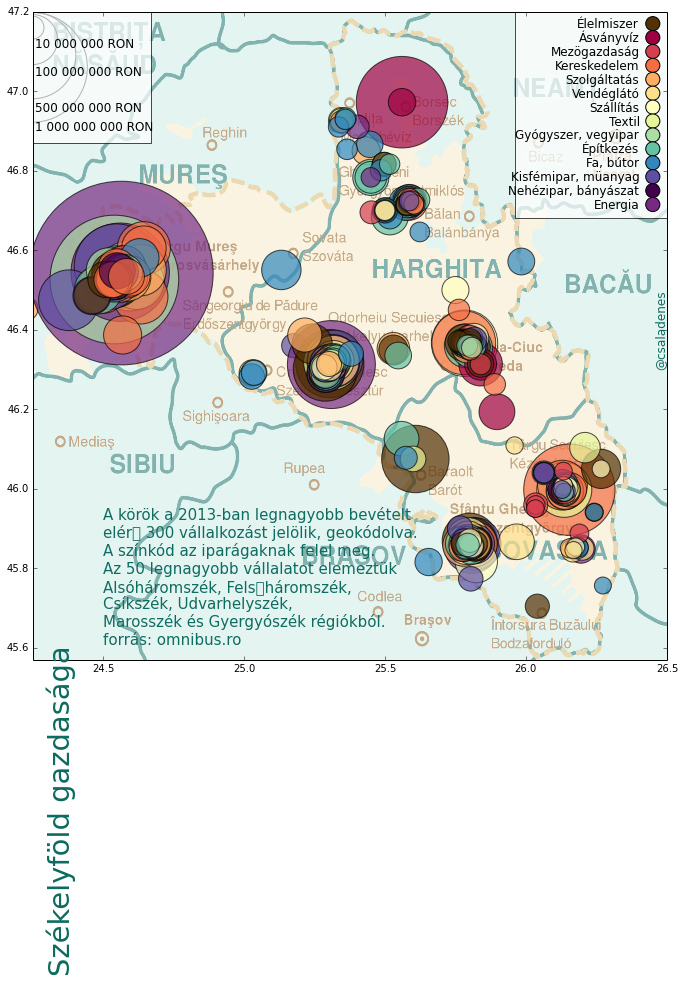

In [112]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(plt.imread('Szekely_Land.jpg'),extent=[24.25,26.5,45.57,47.2],alpha=0.5)

i=6
l=np.array(data[i][1].values,dtype=str)
x=data[i]['lon'].values
y=data[i]['lat'].values
colors=['#543005','#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#ffffbf',\
        '#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2','#40004b','#762a83']
sectors=['ELELMISZER','ASVANYVIZ','MEZOGAZDASAG','KERESKEDELEM','SZOLGALTATAS','VENDEGLATO','SZALLITAS',\
        'TEXTIL','GYOGYSZER, VEGYIPAR','EPITKEZES','FA, BUTOR','KISFEM, MUANYAG','NEHEZIPAR, BANYASZAT','ENERGIA']
sectors2=[u'Élelmiszer',u'Ásványvíz',u'Mezögazdaság',u'Kereskedelem',u'Szolgáltatás',u'Vendéglátó',u'Szállítás',\
        u'Textil',u'Gyógyszer, vegyipar',u'Építkezés',u'Fa, bútor',u'Kisfémipar, müanyag',u'Nehézipar, bányászat',u'Energia']
c=[colors[cat[data[i]['tags'].values[k]]] for k in range(len(data[i]))]
s=np.array(data[i][2].map(lambda x: ''.join(x.split('.'))).values,dtype=float)
l=[l[k]+';'+sectors2[cat[data[i]['tags'].values[k]]]+';'+repr(round(s[k]/1000000,1))+'M RON' for k in range(len(l))]
catdict={}
sumdict={}
for w in range(len(data[i]['tags'])):
    if cat[data[i]['tags'].values[w]] in catdict:
        catdict[cat[data[i]['tags'].values[w]]]+=1
        sumdict[cat[data[i]['tags'].values[w]]]+=s[w]
    else:
        catdict[cat[data[i]['tags'].values[w]]]=1
        sumdict[cat[data[i]['tags'].values[w]]]=s[w]

#change s for repr
formfactor=0.68
s=(s/1000)**formfactor
ax.add_patch(Rectangle((25.96, 46.68), 26.54-26, 47.2-46.68, facecolor="white",alpha=0.7))
ax.add_patch(Rectangle((24.25, 46.87), 0.42, 47.2-46.87, facecolor="white",alpha=0.7))
for w in range(len(sectors)):
    ax.scatter(26.45,47.17-w*0.035,s=200,c=colors[w],zorder=10+w)
    ax.text(26.4,47.16-w*0.035,sectors2[w],size=12,horizontalalignment ="right")
ax.scatter(24.25,47.06,(1000000000/1000)**formfactor,facecolor='none')
ax.scatter(24.25,47.13,(100000000/1000)**formfactor,facecolor='none')
ax.scatter(24.25,47.09,(500000000/1000)**formfactor,facecolor='none')
ax.scatter(24.25,47.16,(10000000/1000)**formfactor,facecolor='none')
ax.text(24.26,46.90,"1 000 000 000 RON",size=12,horizontalalignment ="left")
ax.text(24.26,46.95,"500 000 000 RON",size=12,horizontalalignment ="left")
ax.text(24.26,47.04,"100 000 000 RON",size=12,horizontalalignment ="left")
ax.text(24.26,47.11,"10 000 000 RON",size=12,horizontalalignment ="left")

scatter=ax.scatter(x,y,s,c,alpha=0.7)
#tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels= list(l)) #old, plain text, non-HTML tooltip

# Define some CSS to control our custom labels
from StringIO import StringIO
css = """
table
{
  border-collapse: collapse;
  opacity:1;
}
th
{
  color: #ffffff;
  background-color: rgb(132,179,173);
}
td
{
  background-color: rgb(228,242,240);
}
table, th, td
{
  border: 1px solid black;
  text-align: left;
}
"""
labels=[]
for ll in range(len(l)):
    labels.append((pd.read_csv(StringIO(l[ll]),sep=';',names=['Név','Iparág','Bevétel']).set_index('Név').T.to_html()))
tooltip = mpld3.plugins.PointHTMLTooltip(scatter, labels,
                                   voffset=10, hoffset=10, css=css)
mpld3.plugins.connect(fig, tooltip)
ax.set_xlim(24.25,26.5)
ax.set_ylim(45.57,47.2)
ax.set_aspect(1.41)

#leiras
hpt=u"@csaladenes"
ax.text(26.48,46.3,hpt,size=12,horizontalalignment ="center",verticalalignment ="bottom",rotation=90,color="#0e6b5f")
hpt=u"Székelyföld gazdasága"
ax.text(24.3,45.6,hpt,size=29,horizontalalignment ="left",verticalalignment ="top",rotation=90,color="#0e6b5f")
txsize=15
txspacing=0.003
hpt=u"forrás: omnibus.ro"
ax.text(24.5,45.6,hpt,size=txsize,horizontalalignment ="left",verticalalignment ="bottom",color="#0e6b5f")
hpt=u"Marosszék és Gyergyószék régiókból."
ax.text(24.5,45.6+txsize*txspacing,hpt,size=txsize,horizontalalignment ="left",verticalalignment ="bottom",color="#0e6b5f")
hpt=u"Csíkszék, Udvarhelyszék,"
ax.text(24.5,45.6+2*txsize*txspacing,hpt,size=txsize,horizontalalignment ="left",verticalalignment ="bottom",color="#0e6b5f")
hpt=u"Alsóháromszék, Felsőháromszék,"
ax.text(24.5,45.6+3*txsize*txspacing,hpt,size=txsize,horizontalalignment ="left",verticalalignment ="bottom",color="#0e6b5f")
hpt=u"Az 50 legnagyobb vállalatot elemeztük"
ax.text(24.5,45.6+4*txsize*txspacing,hpt,size=txsize,horizontalalignment ="left",verticalalignment ="bottom",color="#0e6b5f")
hpt=u"A színkód az iparágaknak felel meg."
ax.text(24.5,45.6+5*txsize*txspacing,hpt,size=txsize,horizontalalignment ="left",verticalalignment ="bottom",color="#0e6b5f")
hpt=u"elérő 300 vállalkozást jelölik, geokódolva."
ax.text(24.5,45.6+6*txsize*txspacing,hpt,size=txsize,horizontalalignment ="left",verticalalignment ="bottom",color="#0e6b5f")
hpt=u"A körök a 2013-ban legnagyobb bevételt"
ax.text(24.5,45.6+7*txsize*txspacing,hpt,size=txsize,horizontalalignment ="left",verticalalignment ="bottom",color="#0e6b5f")

plt.subplots_adjust(0.03,0.05,0.95,0.95)
plt.show()

In [81]:
np.array([228,242,240])/255.0

array([ 0.89411765,  0.94901961,  0.94117647])

In [1510]:
fig.savefig('prelim.png'); 

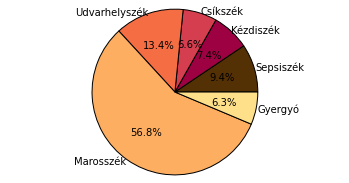

In [106]:
regiok=[u'Sepsiszék',u'Kézdiszék',u'Csíkszék',u'Udvarhelyszék',u'Marosszék',u'Gyergyó']
fig, ax = plt.subplots(figsize=(6,3))
pie=ax.pie([np.array(data[i][2].map(lambda x: ''.join(x.split('.'))).values,dtype=float).sum() for i in range(6)],colors=colors,\
           labels=regiok,autopct='%1.1f%%',\
           labeldistance=1.02)
ax.axis('equal')
plt.show()

In [1481]:
fig.savefig('pie.png'); 

In [111]:
from mpl_toolkits.mplot3d import axes3d

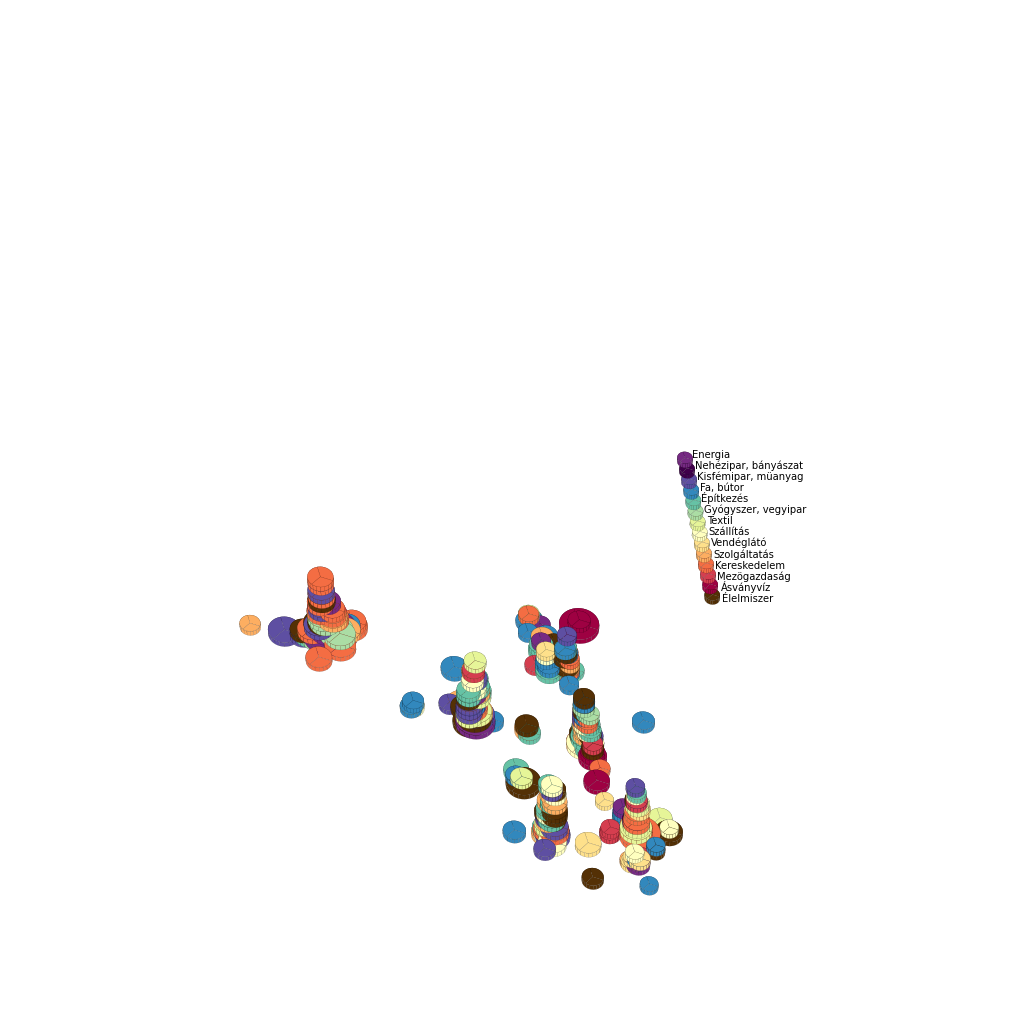

In [113]:
fig=plt.figure(figsize=(14,14))
ax=axes3d.Axes3D(fig,azim=-70,elev=55)
ax._axis3don = False

i=6

scale=1
xlim=np.array([24.25,26.5])
ylim=np.array([45.57,48.00])

points=[]
for j in range(len(data[i])):
    index=j
    hindex=0
    r=(s[index]/100000000)**0.25
    for p in range(len(points)):
        if (np.sqrt((points[p][0]-x[index])**2+(points[p][1]-y[index])**2)<((abs(r-points[p][2]))*1.3)):
            hindex+=1 
    
    points.append([x[index],y[index],r])
    
    # Cylindrical shell   
    phi = np.linspace(0, 2 * np.pi, 100) 
    r1 = np.ones(100) 
    h1 = np.linspace(hindex, hindex+1, 100) 

    x1 = r * np.outer(np.cos(phi), r1) + x[index]
    y1 = r * np.outer(np.sin(phi), r1) + y[index]
    z1 = 1 * np.outer(np.ones(np.size(r1)), h1) 

    # Top cover 
    phi_a = np.linspace(0, 2 * np.pi, 100) 
    h2 = np.ones(100)               
    r2 = np.linspace(0, 1, 100) 

    phi_grid, r_grid = np.meshgrid(phi_a, r2)
    x2 = r * np.cos(phi_grid) * r_grid + x[index]
    y2 = r * np.sin(phi_grid) * r_grid + y[index]
    z2 = (hindex+1) * np.ones([100,100])

    ax.plot_surface(x1*scale, y1*scale, z1,  rstride=5, cstride=100, linewidth=0.1, alpha=1, shade=False,color=c[index]) 
    ax.plot_surface(x2*scale, y2*scale, z2,  rstride=100, cstride=34, linewidth=0.1, alpha=1, shade=False,color=c[index]) 

    #ax.plot_surface(X,Y,Z,shade=False,color=c[j],linewidth=0.2,alpha=0.9)
    #ax.plot_surface(x_2, y_2, z_2,  rstride=34, cstride=20, shade=False,color=c[j],linewidth=0.2,alpha=0.9) 

for w in range(len(sectors)):
    r=0.033
    # Cylindrical shell   
    phi = np.linspace(0, 2 * np.pi, 100) 
    r1 = np.ones(100) 
    h1 = np.linspace(w, w+1, 100) 

    x1 = r * np.outer(np.cos(phi), r1) + 26.05-0.02*w
    y1 = r * np.outer(np.sin(phi), r1) + 47.34+0.03*w
    z1 = 1 * np.outer(np.ones(np.size(r1)), h1) 

    # Top cover 
    phi_a = np.linspace(0, 2 * np.pi, 100) 
    h2 = np.ones(100)               
    r2 = np.linspace(0, 1, 100) 

    phi_grid, r_grid = np.meshgrid(phi_a, r2)
    x2 = r * np.cos(phi_grid) * r_grid + 26.05-0.02*w
    y2 = r * np.sin(phi_grid) * r_grid + 47.34+0.03*w
    z2 = (w+1) * np.ones([100,100])

    ax.plot_surface(x1*scale, y1*scale, z1,  rstride=5, cstride=100, linewidth=0.1, alpha=1, shade=False,color=colors[w]) 
    ax.plot_surface(x2*scale, y2*scale, z2,  rstride=100, cstride=34, linewidth=0.1, alpha=1, shade=False,color=colors[w])
    ax.text2D(0.71-w*0.0023, 0.41+w*0.011,sectors2[w], transform=ax.transAxes)
'''    
for w in range(3):
    r=0.3
    
    radii=['100','45','765']
    # Cylindrical shell   
    phi = np.linspace(0, 2 * np.pi, 100) 
    r1 = np.ones(100) 
    h1 = np.linspace(w, w+1, 100) 

    x1 = r/(w+1) * np.outer(np.cos(phi), r1) + 26.5+0.0*w
    y1 = r/(w+1)  * np.outer(np.sin(phi), r1) + 47+0.0*w
    z1 = 1 * np.outer(np.ones(np.size(r1)), h1) 

    # Top cover 
    phi_a = np.linspace(0, 2 * np.pi, 100) 
    h2 = np.ones(100)               
    r2 = np.linspace(0, 1, 100) 

    phi_grid, r_grid = np.meshgrid(phi_a, r2)
    x2 = r/(w+1)  * np.cos(phi_grid) * r_grid + 26.5+0.0*w
    y2 = r/(w+1)  * np.sin(phi_grid) * r_grid + 47+0.0*w
    z2 = (w+1) * np.ones([100,100])

    ax.plot_surface(x1*scale, y1*scale, z1,  rstride=5, cstride=100, linewidth=0.1, alpha=0.5, shade=False,color='grey') 
    ax.plot_surface(x2*scale, y2*scale, z2,  rstride=100, cstride=34, linewidth=0.1, alpha=0.5, shade=False,color='grey')
    ax.text2D(0.84, 0.41+w*0.011,radii[w], transform=ax.transAxes)
'''

ax.set_xlabel('HOSSZUSAG')
ax.set_ylabel('SZELESSEG')
ax.set_zlim([0,70])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.show()

In [1464]:
fig.savefig('3d.svg'); 

In [ ]:
#create json for treemap
#letrehozzuk a json fajlokat a faterkepekhez a falre szotarbol

#elso iparagak szerint, masodik szekek szerint

In [109]:
flare={"name":u"Székelyföld gazdasága infografika","children":[]}
for i in range(len(sectors2)):
    flare["children"].append({'name':i,"children":[]})
    for w in range(len(data[6])):
        if cat[data[6]['tags'].values[w]]==i:
            flare["children"][i]["children"].append({"name": np.array(data[6][1].values,dtype=str)[w], \
                                                     "size": np.array(data[6][2].map(lambda x: ''.join(x.split('.'))).values,dtype=float)[w]})
                
import json
file('flare.json','w').write(json.dumps(flare))


In [110]:
flare={"name":u"Székelyföld gazdasága infografika","children":[]}
for i in range(len(regiok)):
    flare["children"].append({'name':i,"children":[]})
    for w in range(len(data[i])):
        flare["children"][i]["children"].append({"name": np.array(data[i][1].values,dtype=str)[w], \
                                                     "size": np.array(data[i][2].map(lambda x: ''.join(x.split('.'))).values,dtype=float)[w]})
                
import json
file('flare2.json','w').write(json.dumps(flare))